## Lab: Practical Application of Transpose Convolution  
This lab will guide you through creating, training, and evaluating models that use transpose convolution layers for tasks such as image reconstruction.

Learning objectives:
By the end of this lab, you will:

Apply transpose convolution in practical scenarios using Keras.

Create, compile, train, and evaluate the model

Visualize the results

Prerequisites:
Basic understanding of Python programming

Familiarity with convolutional neural network (CNN) concepts

Keras and TensorFlow installed

#### Steps: 
**Step 1: Import Necessary Libraries**

Before you start, make sure to import the required libraries: TensorFlow and Keras. Keras is included within TensorFlow as `tensorflow.keras`. 

In [2]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from keras.api.models import Model
from keras.api.layers import Input, Conv2D, Conv2DTranspose, UpSampling2D
import numpy as np
import matplotlib.pyplot as plt

tensorflow is the main library for machine learning in Python.

Model, Input, Conv2D, and Conv2DTranspose are used to create and manipulate the layers in your model.

numpy and matplotlib are used for data manipulation and visualization.

In [3]:
input_layer = Input(shape = (28, 28, 1))
# Input(shape = (28, 28, 1)) creates an input layer that expects 28 * 28 grayscale images.

**Step 3: Add convolutional and transpose convolutional layers**

You will add a convolutional layer to extract features, followed by a transpose convolution layer to reconstruct the image. 

In [4]:
# creates a convolutional layer with 32 filters
conv_layer = Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same')(input_layer)
# creates a transpose convolution layer for reconstructing the image
transpose_conv_layer = Conv2DTranspose(filters = 1, kernel_size = (3, 3), activation = 'sigmoid', padding = 'same' )(conv_layer)

In [6]:
# creates a Keras model that connects the input layer to the output layer through the convolutional and transpose convolutional layers
model = Model(inputs = input_layer, outputs = transpose_conv_layer)
# before training the model, we need to compile it, which requires specifying the optimizer and loss function and evaluating metrics
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# optimizer = 'adam' sepcifies the Adam optimizer
# loss = 'binary_crossentropy' specifies the binary cross-entropy loss function, suitable for binary pixel classificcation

In [ ]:
# train the model
# X_train is a placeholder for your actual training data
X_train = np.random.rand(1000, 28, 28, 1)
# y_train is the same as X_train for image reconstruction
y_train = X_train # For reconstruction, the target is the input
# model.fit trains the model for a specified number of epochs and batch size
history = model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0780 - val_loss: 0.0626
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0562 - val_loss: 0.0375
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0321 - val_loss: 0.0186
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0157 - val_loss: 0.0093
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0081 - val_loss: 0.0056
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0052 - val_loss: 0.0042
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0039 - val_loss: 0.0033
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023 - val_loss: 0.0021


In [9]:
# After training, you can evaluate the model on test data to see how well it performs
# Generate synthetic test data
# X_test and y_test are placeholders for your actual test data
X_test = np.random.rand(200, 28, 28, 1)
y_test = X_test
# model.evaluate computes the loss of the model on test data
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020
Test loss: 0.002053452655673027


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


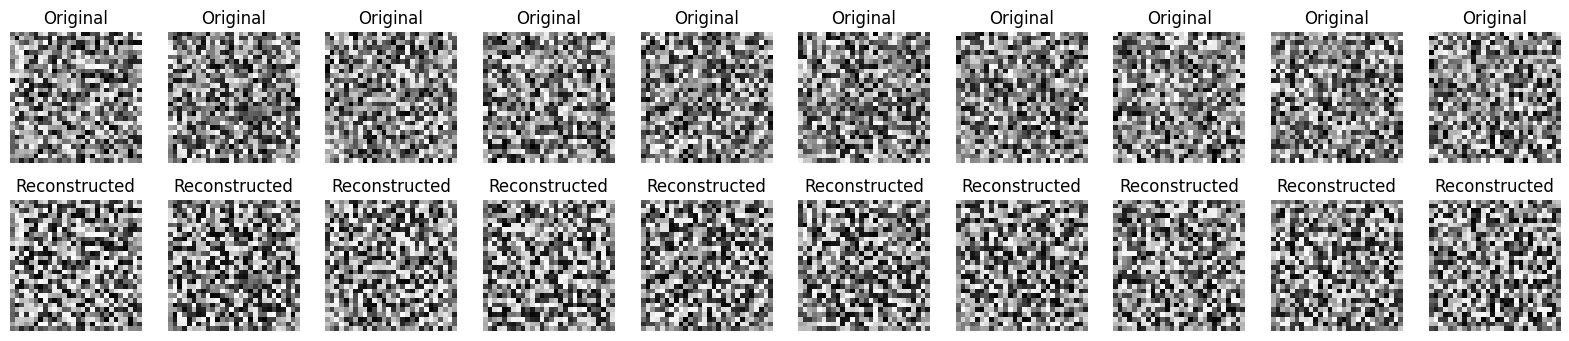

In [ ]:
# To better understand the model's performance, let's visualize some reconstructed images.
# Predict on test data
# model.predict generates predictions for the test data
# plt.imshow visualizes the original and reconstructed images side by side for comparison
y_pred = model.predict(X_test)

# Plot some sample images
n = 10  # Number of samples to display

plt.figure(figsize = (20, 4))

for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap = 'gray')
    plt.title("Original")
    plt.axis('off')
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(y_pred[i].reshape(28, 28), cmap = 'gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

In [12]:
input_layer = Input(shape = (28, 28, 1))
conv_layer = Conv2D(filters = 32, kernel_size = (5, 5), activation = 'relu', padding = 'same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters = 1, kernel_size = (5, 5), activation = 'sigmoid', padding = 'same')(conv_layer)

model = Model(inputs = input_layer, outputs = transpose_conv_layer)
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.2)
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0724 - val_loss: 0.0420
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0336 - val_loss: 0.0147
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0116 - val_loss: 0.0059
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0052 - val_loss: 0.0040
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023 - val_loss: 0.0022
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022
Test loss: 0.0021756989881396294


In [13]:
input_layer = Input(shape=(28,28,1))
conv_layer = Conv2D(filters=32, kernel_size=(3,3), activation='tanh', padding='same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3,3), activation='tanh', padding='same')(conv_layer)

model=Model(inputs=input_layer, outputs=transpose_conv_layer)
model.compile(optimizer='adam', loss='mean_squared_error')
history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
loss=model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2157 - val_loss: 0.0919
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0761 - val_loss: 0.0456
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0382 - val_loss: 0.0220
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0187 - val_loss: 0.0117
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0103 - val_loss: 0.0075
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0069 - val_loss: 0.0058
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0055 - val_loss: 0.0050
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0049 - val_loss: 0.0046
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0043 - val_loss: 0.0042
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041
Test loss: 0.004119009245187044
